In [1]:
# fetch_olivetti_faces : 총 40명의 얼굴사진이 10장씩 제공되어 있음.

from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt

faces_all = fetch_olivetti_faces()

# 7번 인물의 사진만 선택
K = 7

# faces_all.images
# 64 x 64 픽셀 데이터로 크기가 (400, 64, 64)인 3D 텐서로 제공된 원래의 사진 자료
faces = faces_all.images[faces_all.target == K]

# faces_all.data
# (X3) : PCA 분석을 위해 (400, 64 x 64) 2D 텐서로 변환한 자료 
X3 = faces_all.data[faces_all.target == K]

# Shape 확인
print(faces.shape)
print(X3.shape)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home01/a1383a01/scikit_learn_data
(10, 64, 64)
(10, 4096)


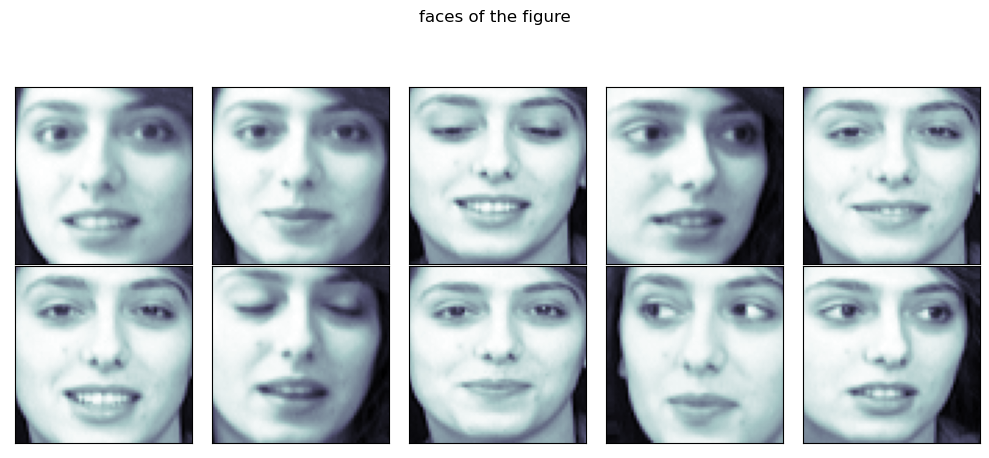

In [2]:
# 총 10개의 사진
# 각 사진은 4096개 (64 x 64)의 특성변수로 구성되어 있음.

N = 2
M = 5

fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(faces[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        
plt.suptitle('faces of the figure')
plt.tight_layout()
plt.show()

In [3]:
# fetch_olivetti_faces.data를 이용하여 2개의 주성분을 가진 PCA를 실행
# 2개의 주성분으로 구성된 (10, 2) 2D 텐서자료 -> 원래 크기인 (10, 4096)으로 환원

# Why?
# (10, 4096) 2D 텐서자료 -> 이미지 자료인 (10, 64, 64)로 바꾼 후 사진자료를 그리기 위함.
# 2개의 주성분으로 복원된 10장의 사진 이미지가 얼마나 원래 이미지와 가까운가를 비교하기 위함.

from sklearn.decomposition import PCA

pca3 = PCA(n_components=2)
W3 = pca3.fit_transform(X3)
X32 = pca3.inverse_transform(W3)
print(W3.shape)
print(X32.shape)

(10, 2)
(10, 4096)


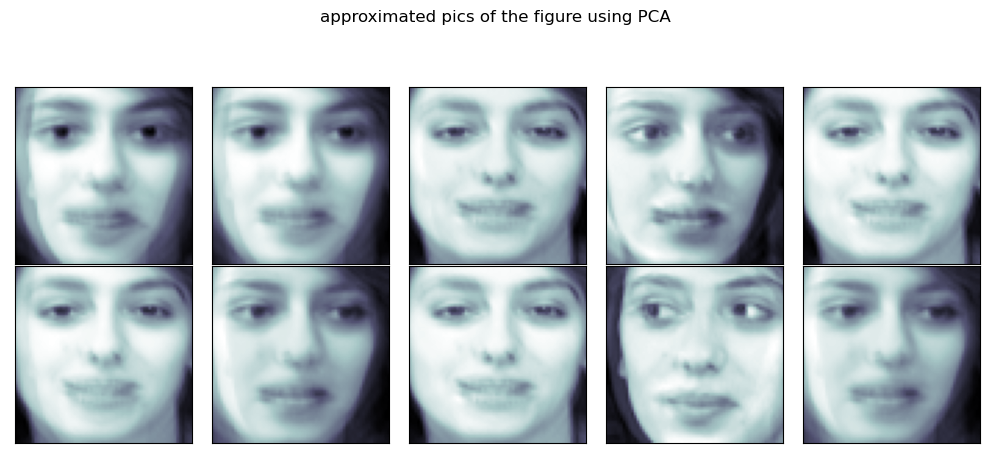

In [4]:
# 2개의 주성분으로 복원된 10장의 이미지 사진
# 원래의 사진과 비교했을 때 약간 흐릿해진 것을 제외하면 원래 사진과 1:1 대응이 충분하게 가능한 사진

# 4096개의 특성변수를 2개로 줄였다는 사실을 상기하면
# 2개의 주성분이 4096개의 특성변수를 잘 대변하고 있다고 할 수 있음.

N = 2
M = 5

fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(X32[k].reshape(64, 64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])

plt.suptitle('approximated pics of the figure using PCA')
plt.tight_layout()
plt.show()

In [5]:
# 2개의 주성분의 평균
face_mean = pca3.mean_.reshape(64, 64)

# 제1주성분으로만 복원된 이미지
face_p1 = pca3.components_[0].reshape(64, 64)

# 제2주성분으로만 복원된 이미지
face_p2 = pca3.components_[1].reshape(64, 64)

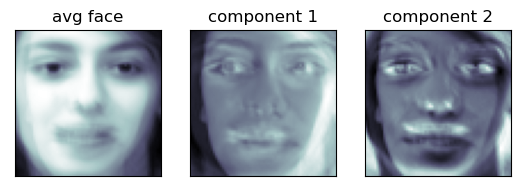

In [6]:
# 주성분의 평균
# 2개의 주성분으로 복원된 10장의 사진 중
# 1행, 2행의 중간에 있는 그림과 유사함
plt.subplot(131)
plt.imshow(face_mean, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title('avg face')

# 제1주성분에 의한 그림
# 좌우로 흔들리는 이미지를 보여주고 있음.
plt.subplot(132)
plt.imshow(face_p1, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title('component 1')

# 제2주성분에 의한 그림
# 상하로 흔들리는 모습
# 눈이 특히 강조됨
plt.subplot(133)
plt.imshow(face_p2, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title('component 2')

plt.show()

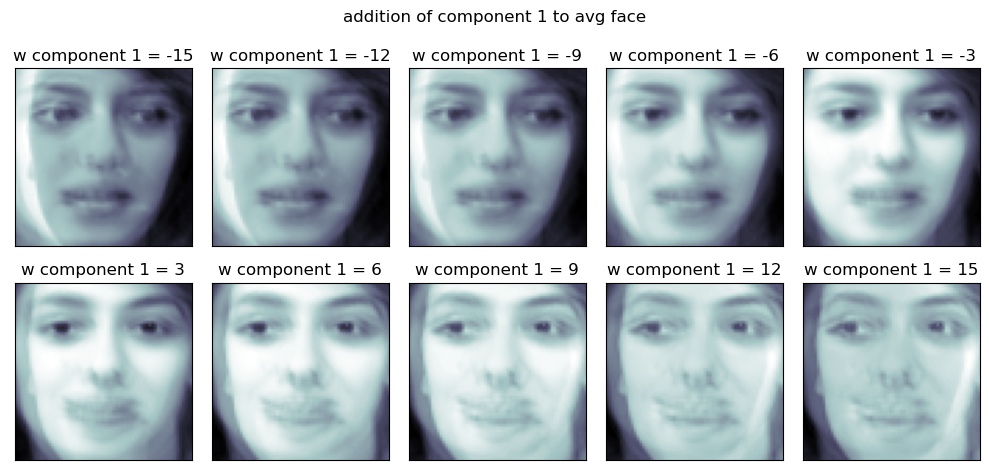

In [16]:
# 주성분의 평균값 + w x 제1주성분에 의해 복원된 그림
# w : -15부터 3씩 증가시켜 15까지의 값을 가짐.
# w가 -15에서 +15로 증가하면서 이미지는 좌측 얼굴에서 점차적으로 우측 얼굴로 움직이는 모습을 보여주고 있음.

# 제1주성분 : 얼굴의 좌/우측을 구분하는 새로운 특성변수임.

N = 2
M = 5

fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0.5, wspace=0.05)

for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 3 * (k-5) if k < 5 else 3 * (k-4)
        ax.imshow(face_mean + w * face_p1, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("w component 1 = {}".format(w))

plt.suptitle("addition of component 1 to avg face")
plt.tight_layout()
plt.show()

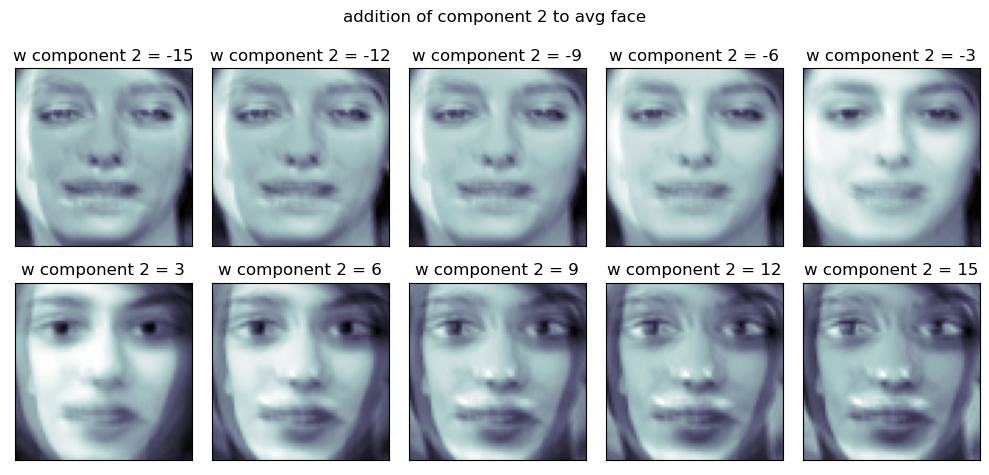

In [17]:
# 주성분의 평균값 + w x 제2주성분에 의해 복원된 그림
# w : -15부터 3씩 증가시켜 15까지의 값을 가짐.
# w가 -15에서 +15로 증가하면서 눈의 크기가 점점 커짐.

# 제2주성분 : 이미지의 눈의 크기를 대표하는 새로운 특성변수임.

N = 2
M = 5

fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0.5, wspace=0.05)

for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 3 * (k-5) if k < 5 else 3 * (k-4)
        ax.imshow(face_mean + w * face_p2, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("w component 2 = {}".format(w))

plt.suptitle("addition of component 2 to avg face")
plt.tight_layout()
plt.show()

### Dummy code for Data Identification

In [24]:
def face(K):
    faces_all = fetch_olivetti_faces()
    faces = faces_all.images[faces_all.target == K]
    X3 = faces_all.data[faces_all.target == K]
    print(faces.shape)
    print(X3.shape)
    N = 2
    M = 5
    fig = plt.figure(figsize=(10, 5))
    plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
    for i in range(N):
        for j in range(M):
            k = i * M + j
            ax = fig.add_subplot(N, M, k+1)
            ax.imshow(faces[k], cmap=plt.cm.bone)
            ax.grid(False)
            ax.xaxis.set_ticks([])
            ax.yaxis.set_ticks([])
    plt.suptitle('faces of the figure %d' % (K))
    plt.tight_layout()
    plt.show()

(10, 64, 64)
(10, 4096)


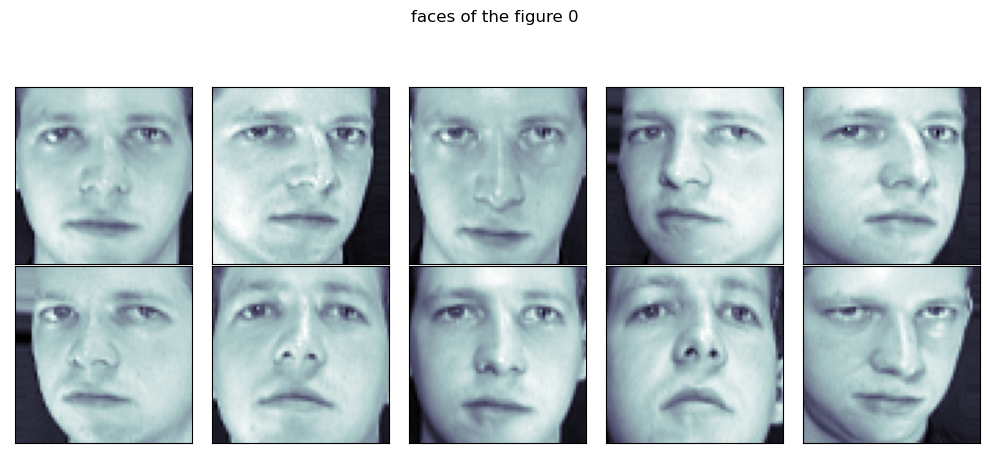

(10, 64, 64)
(10, 4096)


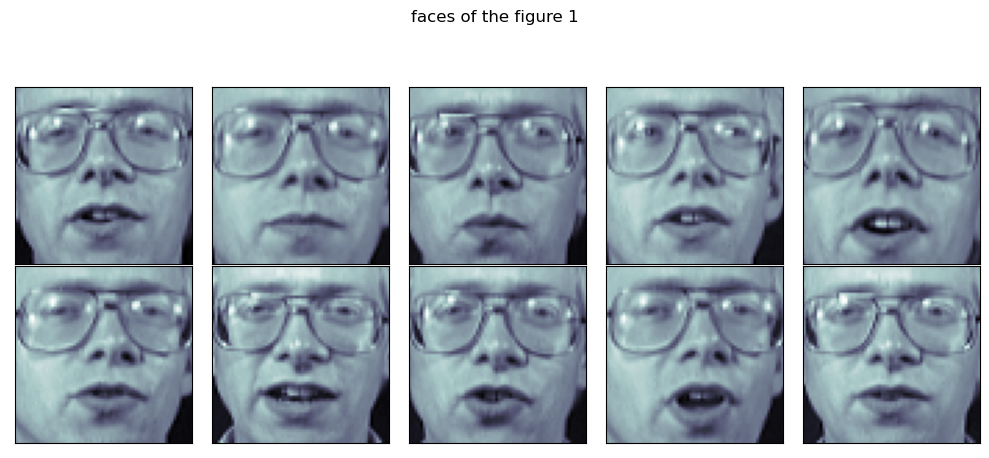

(10, 64, 64)
(10, 4096)


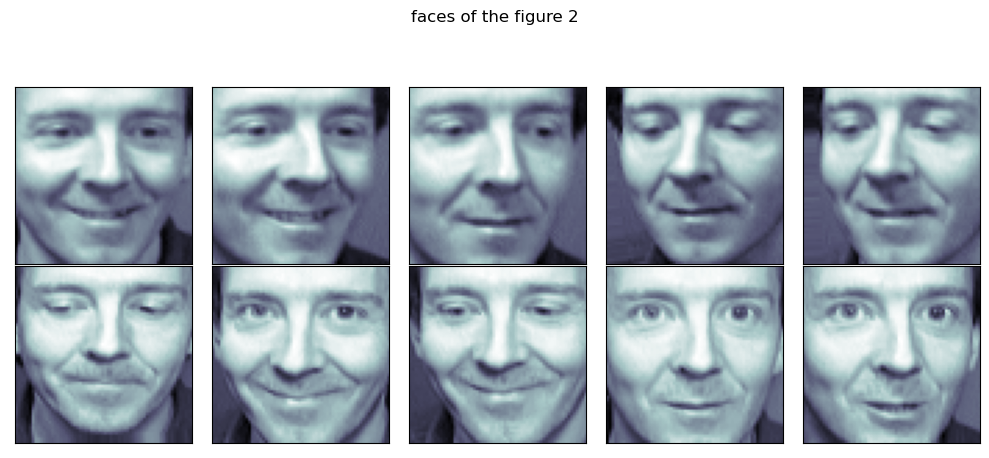

(10, 64, 64)
(10, 4096)


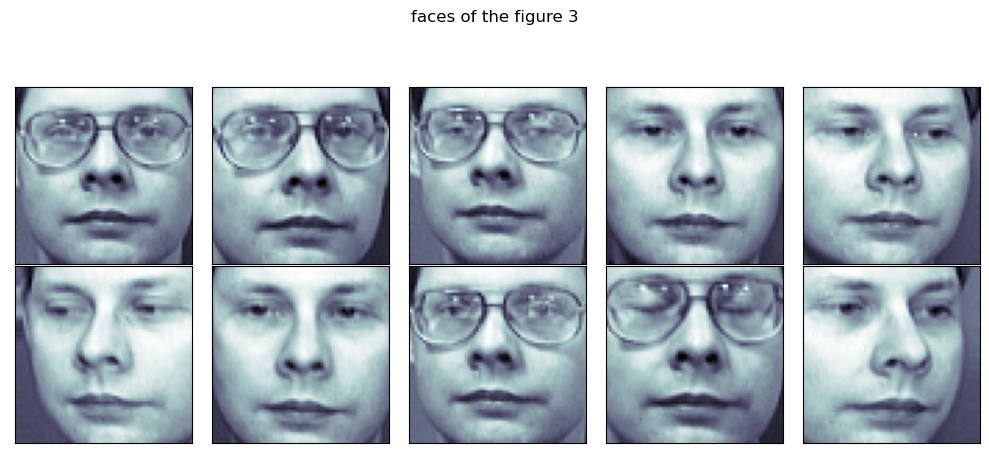

(10, 64, 64)
(10, 4096)


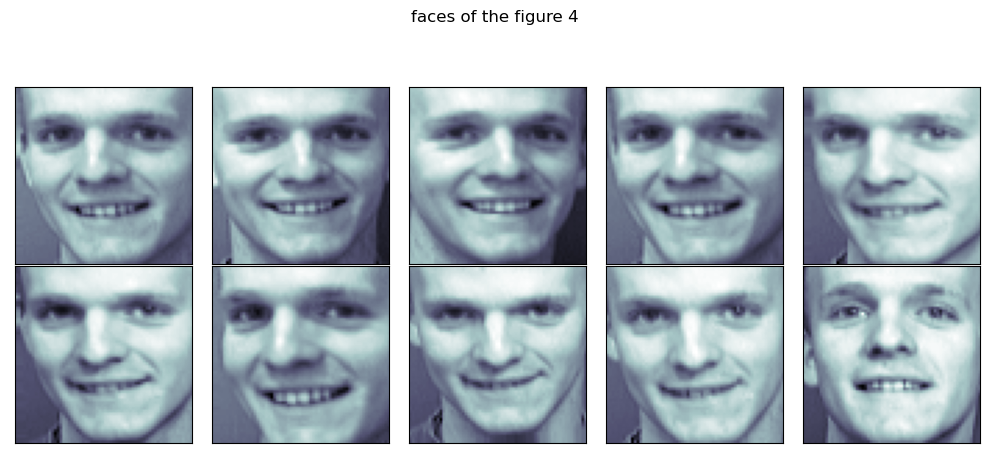

(10, 64, 64)
(10, 4096)


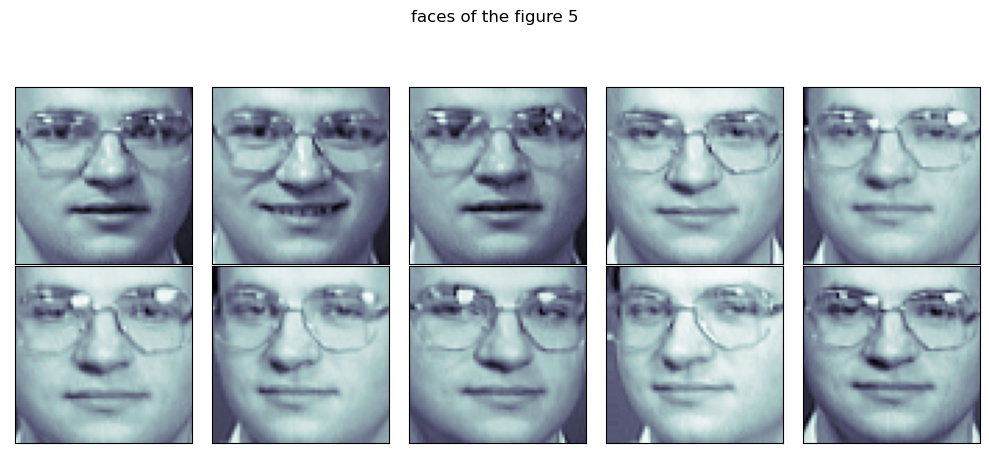

(10, 64, 64)
(10, 4096)


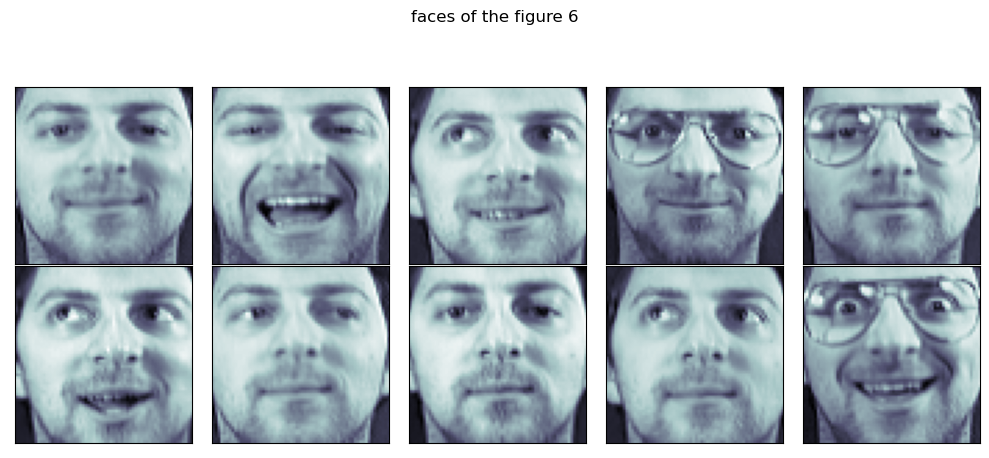

(10, 64, 64)
(10, 4096)


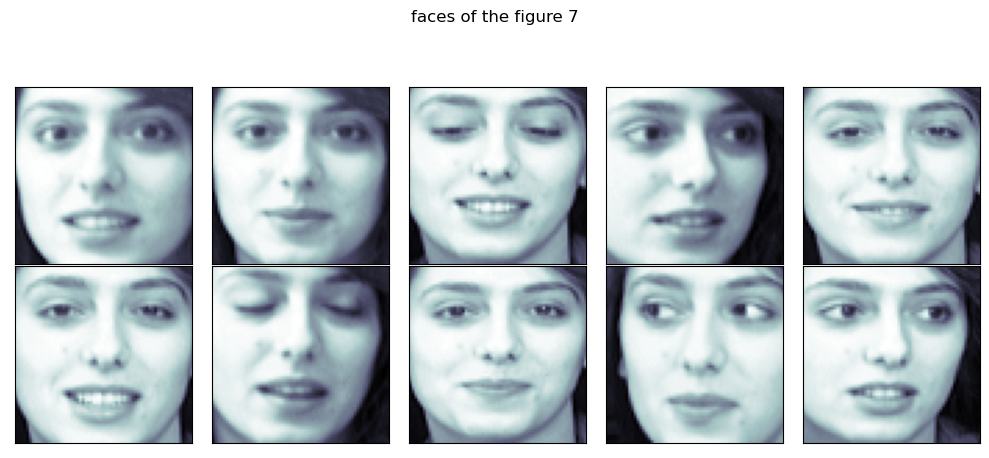

(10, 64, 64)
(10, 4096)


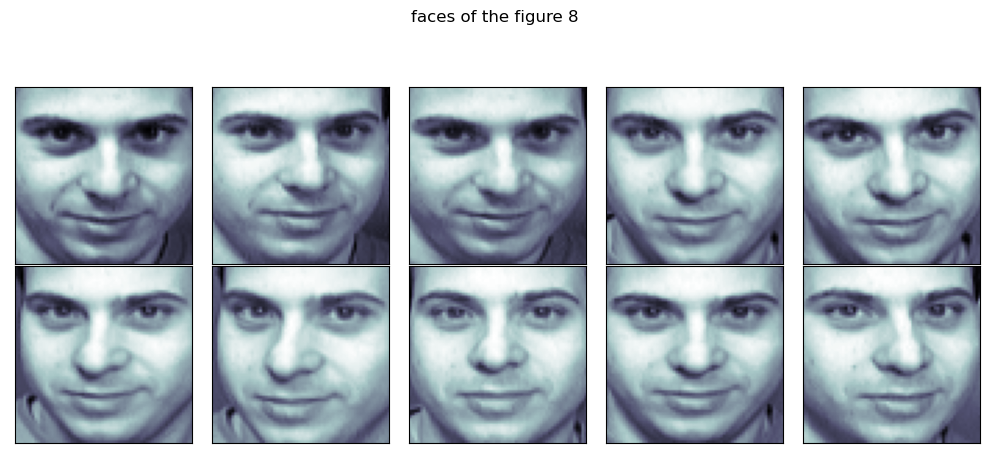

(10, 64, 64)
(10, 4096)


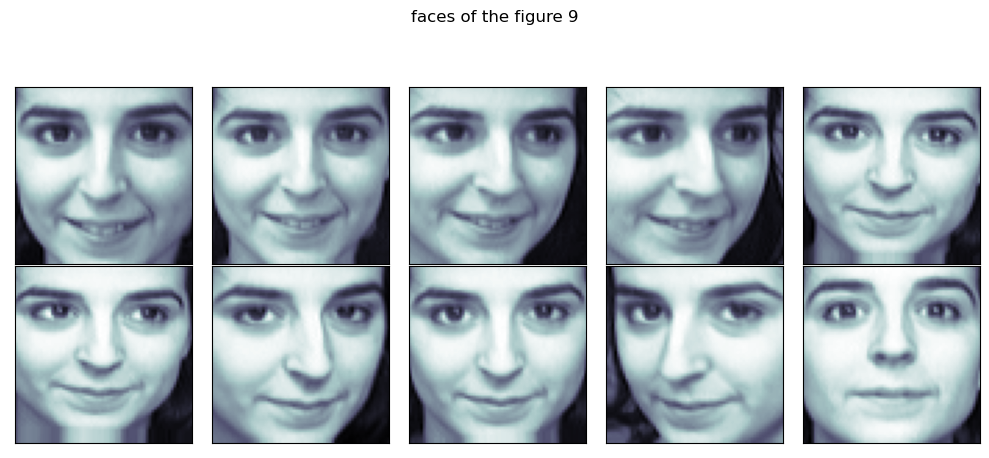

In [25]:
for i in range(0, 10):
    face(i)